# Tarea 6

## Punto 1

## Punto 2 (Titanic)

In [146]:
import pandas as pd
import numpy as np
titanic = pd.read_csv("./Titanic.csv")

Importamos la libreria de sklearn para preprocesamiento de valores categoricos

In [148]:
from sklearn.preprocessing import OneHotEncoder

Separamos los valores que son el objetivo

In [149]:
survived = (titanic["Survived"]).to_numpy()

Creamos la codificacion de los valores categoricos con las columnas importantes del data set

In [186]:
preEncodedconditions = titanic[["Pclass","Sex","SibSp","Parch","Embarked"]]
x = preEncodedconditions.to_numpy()
encoder = OneHotEncoder().fit(x)
conditions = encoder.transform(x).toarray()

Hacemos el modelo de regresion lineal con sus valores de prueba y entrenamiento.

Y evaluamos que tan bueno es para ver si el valor resultado se acerca un poco a la realidad

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(conditions,survived,test_size=0.33,random_state=69)

lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8101694915254237

Acomodamos los valores correspondientes en la estructura de datos para que se puedan codificar correctamente

In [188]:
toPredict = pd.DataFrame({
    "Pclass":[1], 
    "Sex" : ["female"], 
    "SibSp": [0],
    "Parch": [0],
    "Embarked": ["C"]
})
toPredictEncoded = encoder.transform(toPredict.to_numpy()).toarray()

Solicitamos al modelo de regresion lineal que nos prediga con el objetivo si la persona en cuestion sobreviviria.

**R :** Si

In [189]:
lr.predict(toPredictEncoded)

array([1])

## Punto 3

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [204]:
df = pd.read_csv("./q1_data.csv",names=["F1","F2","Binary_Label"])
df.head()

,F1,F2,Binary_Label
0,0.893841,0.448383,0.0
1,-0.763892,0.237633,1.0
2,-0.285130,-0.747463,1.0
3,-0.844328,-0.535827,0.0
4,0.462058,-0.653071,1.0


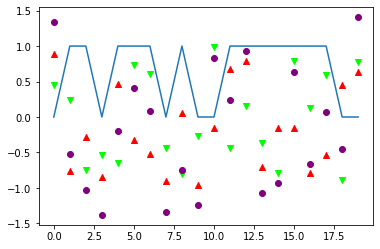

In [224]:
subsectionDf = df[:20]
temp = subsectionDf["F1"] + subsectionDf["F2"]

plt.scatter(subsectionDf.index,subsectionDf["F1"],marker="^",c=["#FF0000"])
plt.scatter(subsectionDf.index,subsectionDf["F2"],marker="v",c=["#00FF00"])
plt.scatter(subsectionDf.index,temp,marker="o",c=["#800080"])
plt.plot(subsectionDf.index,subsectionDf["Binary_Label"])
# plt.plot(subsectionDf.index,subsectionDf["Binary_Label"],marker="*",c=["#800080"])

In [190]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

In [193]:
logReg = LogisticRegression()
cv_results = cross_validate(logReg,df[["F1","F2"]],df["Binary_Label"],cv=10)
print(cv_results)

{'fit_time': array([0.0095129 , 0.00551701, 0.00458765, 0.00511074, 0.00430679,
       0.00501156, 0.00386381, 0.00367904, 0.00467253, 0.00340867]), 'score_time': array([0.00212407, 0.0022471 , 0.00185323, 0.00172162, 0.00163102,
       0.00177288, 0.00151563, 0.00216246, 0.00152874, 0.00145006]), 'test_score': array([0.43, 0.45, 0.47, 0.43, 0.37, 0.46, 0.46, 0.43, 0.44, 0.45])}


In [214]:
logReg.score(df[["F1","F2"]],df["Binary_Label"])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.